# *Analysis 5: GameLineUps*

Each match is associated with details of the teams' __lineups__. 
The table represents the __starting__ lineups and __substitutes__ of various football teams for different matches. 
Let's analyze this table in detail.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/game_lineups.csv')

df.head()

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,8e63d5f47aac2bdb0e54f5481986e104,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,ea4a96d8be410f2d646cf095c4faae7f,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back


From viewing the first rows of the dataset, we can observe that the table contains the following fields:
- **game_lineups_id**: **Unique identifier** for the **player-match combination**. It distinguishes each row as a unique entry.
- **game_id**: **Unique identifier** of the **match**. Each match has a **specific ID**.
- **club_id**: **Unique identifier** of the **club**. This ID differentiates the various clubs.
- **type**: **Type of player participation** in the match. It can be **"starting_lineup"** (**starting lineup**) or **"substitutes"** (**substitute**).
- **number**: The player's **shirt number**. Identifies the number the player wears during the match.
- **player_id**: **Unique identifier** of the **player**. Each player has a **specific ID**.
- **player_name**: **Player's name**. The full name of the player.
- **team_captain**: Indicator if the player is the **team captain**. Possible values are **1** (**yes**) and **0** (**no**).
- **position**: The player's **position** on the field. Describes the specific position the player occupies (e.g., **"Centre-Forward"**, **"Goalkeeper"**, **"Right-Back"**).


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (119133, 9)


Like the Games and ClubGames tables, which are used to store continuously updated data, the GameLineUps table is also subject to __frequent modifications__ (given the number of rows).


In [4]:
df.isnull().sum()

game_lineups_id    0
game_id            0
club_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

Unlike the previous tables, the GameLineUps table __does not contain__ any __null values__ in its columns, so there is no need to perform data cleaning operations.


**Player Distribution by Position**: The frequency of players in each position within the lineup is visualized using a pie chart. This helps us understand which positions are most popular among players.


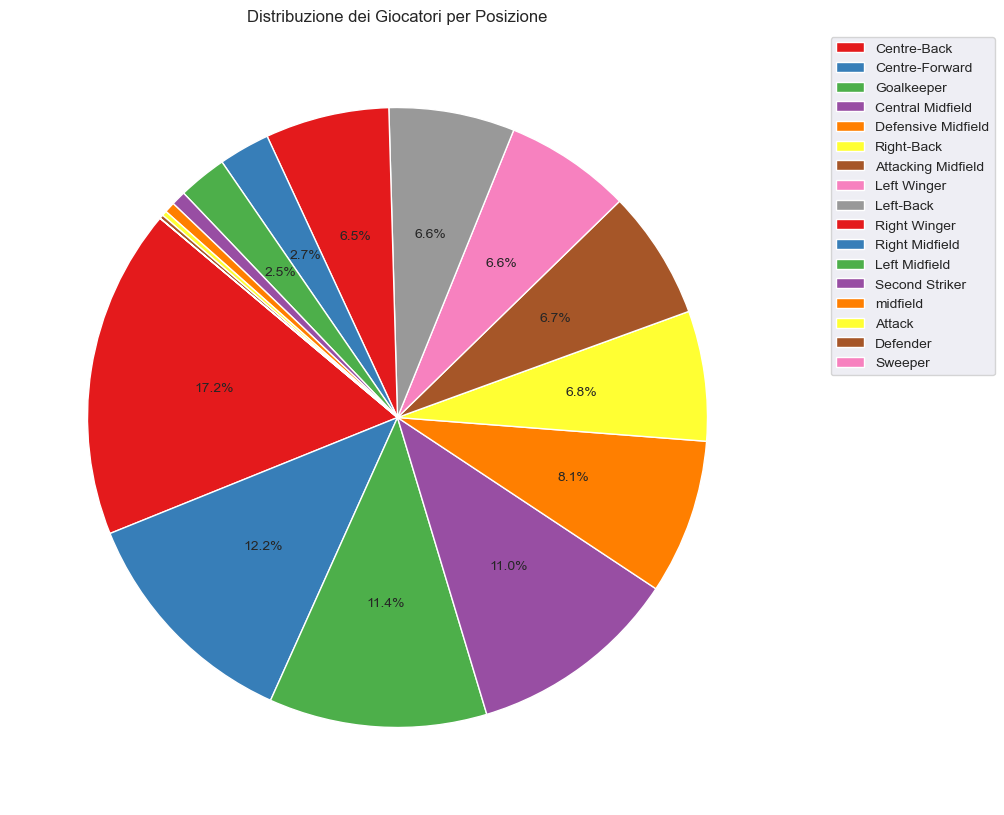

In [5]:
from Utils.GameLineUpsUtils import plot_position_distribution
position_counts = df['position'].value_counts()

plot_position_distribution(position_counts)


**Player Number Distribution**: The frequency of player numbers is visualized using a line chart. This gives us an idea of which numbers are preferred by players.
As expected, numbers between __1__ and __10__ are the most popular.


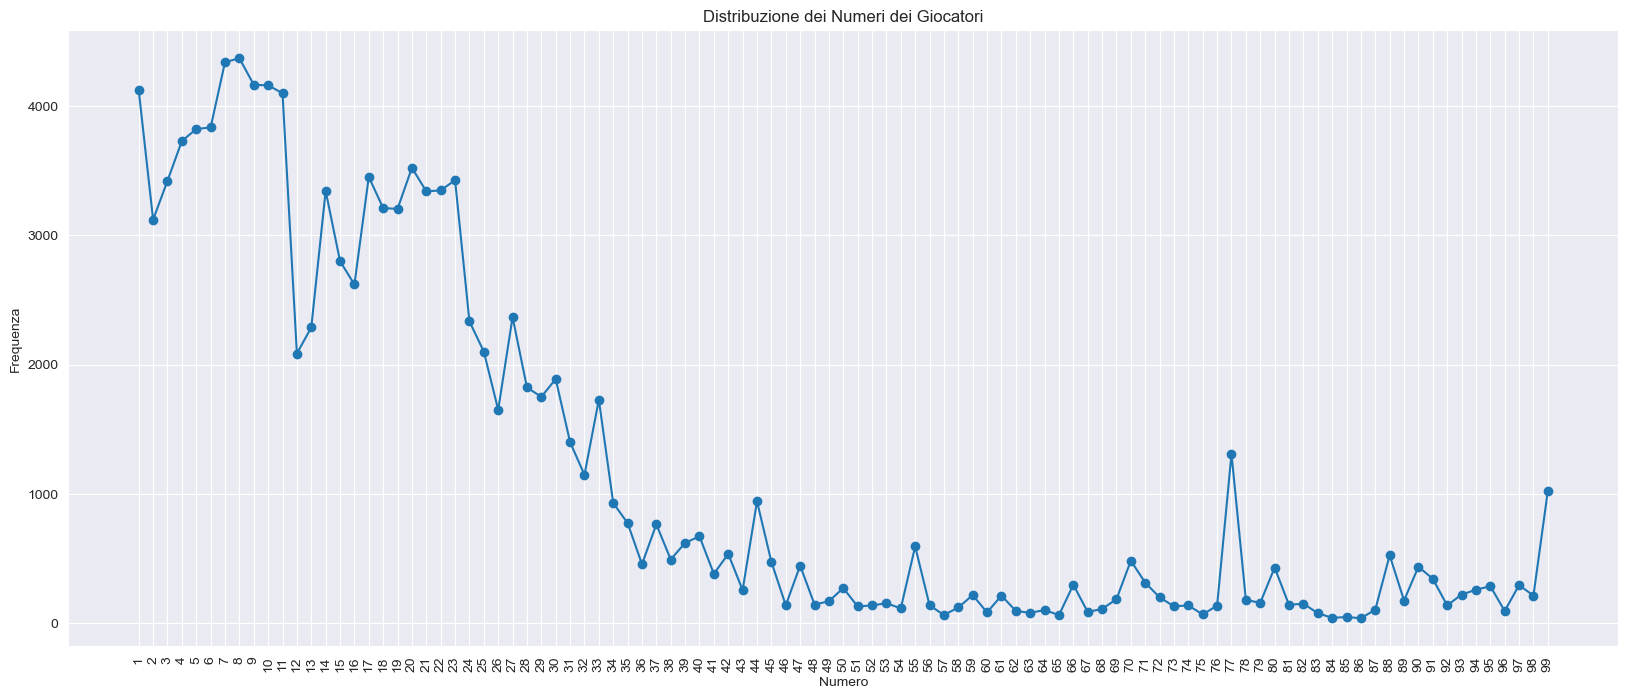

In [6]:
df['number'] = pd.to_numeric(df['number'], errors='coerce')

number_counts = df['number'].value_counts().sort_index()

number_counts.sort_index(inplace=True)

plt.figure(figsize=(20,8))
plt.plot(number_counts.index, number_counts.values, marker='o')
plt.title('Distribuzione dei Numeri dei Giocatori')
plt.xlabel('Numero')
plt.ylabel('Frequenza')
plt.xticks(ticks=number_counts.index, rotation=90)
plt.grid(True)
plt.show()

Another useful data point for analysis is the **team_captain** column, which indicates if a player is the team's captain. We can use a **Strip Plot** to visualize the distribution of the number of **times** a player has been the **captain**.


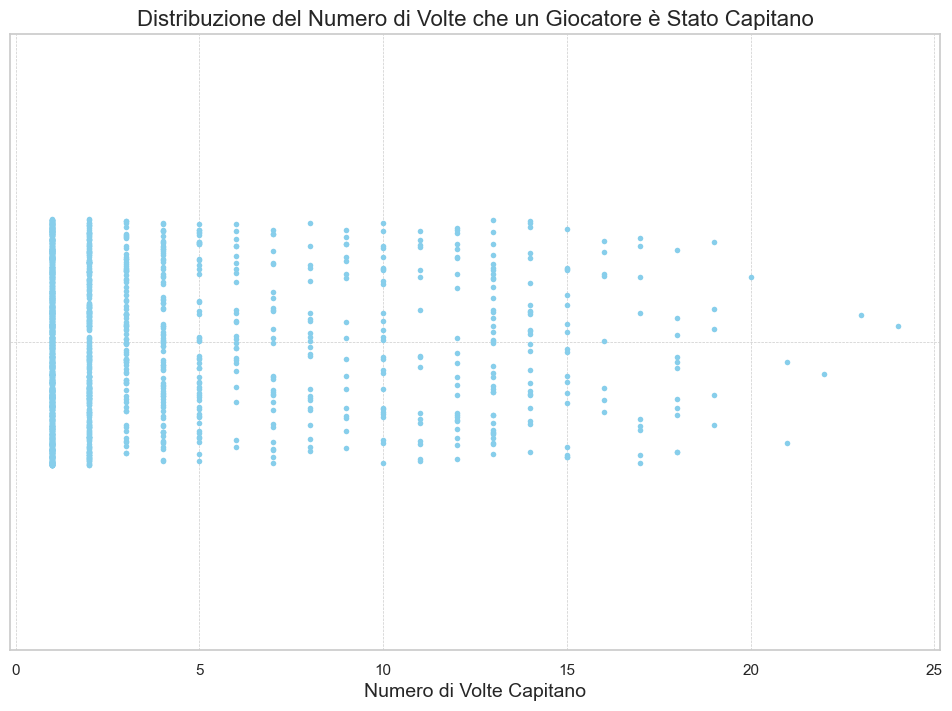

In [7]:
captains = df[df['team_captain'] == 1]
captain_counts = captains['player_name'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.stripplot(x=captain_counts, color='skyblue', jitter=0.2, size=4)
plt.title('Distribuzione del Numero di Volte che un Giocatore è Stato Capitano', fontsize=16)
plt.xlabel('Numero di Volte Capitano', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()